# NGC 6 | Week 3 | Phase 1

## 1. Perkenalan   

Nama = Muhammad Ashar Ihsan

Batch = 035

Objective = Kita merupakan seorang data scientist yang ditugaskan untuk membuat customer segmentation. Data yang digunakan merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir. Dengan begitu kita akan membuat cluster dan memberikan rekomendasi bisnis dari setiap Customer Cluster yang terbentuk.

## 2. Query SQL

```sql
df = client.query('''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_035_rmt.credit-card-information`
''').to_dataframe()
```

## 3. Import Libraries

In [167]:
from google.colab import auth
from google.cloud import bigquery
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore') #turn off warning
from sklearn.preprocessing import StandardScaler
import pickle
import json
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans

## 4. Data Loading

In [12]:
# menghubungkan colab dan BigQuery
auth.authenticate_user()
print('Authenticated')

project_id = "gc-6-436202" # menggunakan kode project yang kita miliki
client = bigquery.Client(project=project_id)

Authenticated


In [14]:
df = client.query('''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_035_rmt.credit-card-information`
''').to_dataframe()

df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3091,3.833185,0.125000,45.00,45.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.000000,NaN,0.000000,8
4,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
8946,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
8947,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.000000,11
8948,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


In [26]:
# setelah data telah diambil diatas, kita akan mengambil semua data dengan column CUST_ID bernilai ganjil saja

df_new = df[df['CUST_ID'] % 2 == 1]

df_new


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
9,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
11,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
12,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
13,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
8942,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
8943,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
8944,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [27]:
# menampilkan 10 data pertama dari dataset

df_new.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
9,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
11,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
12,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
13,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
14,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
15,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
16,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
17,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
19,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [25]:
# menampilkan 10 data terakhir dari dataset

df_new.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8928,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
8930,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
8932,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
8938,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
8939,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
8940,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
8942,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
8943,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
8944,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
8947,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [23]:
# setelah kita memiliki dataset yang siap kita analisis, sebelumnya kita simpan dahulu ke dalam bentuk csv

df_new.to_csv('P1G6_Set_1_Ashar_Ihsan.csv', index=False)

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4475 entries, 3 to 8947
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   Int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   Int64  
 12  PURCHASES_T

Insight:

- Totalnya terdapat 18 kolom dan 4475 rows,
- Terbagi menjadi 18 kolom numerical dengan 4 kolom integer dan 14 kolom float.

In [20]:
df_new.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Terlihat pada kolom kolomnya tidak terdapat whitespace.

In [28]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4475.0,2583.931114,1.0,2238.0,4475.0,6712.0,8949.0
BALANCE,4475.0,1563.205717,2072.045789,0.0,124.432849,871.35543,2047.570799,18495.55855
BALANCE_FREQUENCY,4475.0,0.876933,0.238222,0.0,0.888889,1.0,1.0,1.0
PURCHASES,4475.0,1003.251343,2060.03473,0.0,39.56,360.0,1102.42,41050.4
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.0,0.0,45.65,575.22,40624.06
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.0,0.0,88.62,455.885,14686.1
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.0,0.0,0.0,1138.887754,47137.21176
PURCHASES_FREQUENCY,4475.0,0.490579,0.402907,0.0,0.083333,0.5,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202301,0.298203,0.0,0.0,0.083333,0.25,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.363886,0.397603,0.0,0.0,0.166667,0.75,1.0


Insight:
- Rata-rata purchases per account berada diangka 1003 dengan purchase maksimal diangka 41050 dan minimal 0.

- Bisa kita lihat juga rata rata tenure yang dimiliki customer 11 bulan, dimana yang paling kecil berada di 6 bulan dan yang terlama di 12 bulan.

In [29]:
# pengecekan apakah missing value
df_new.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


Terlihat pada kolom minimum payments ada 155 missing value dimana akan kita coba cek lebih lanjut pada feature engineering missing value ini harus dihandle seperti apa.

In [30]:
# cek rows duplicate
df_new.duplicated().sum()

0

Terlihat untuk rows tidak ada yang duplicate sehingga tidak perlu dihandling.

## 5. EDA

Masuk kepada bagian eksporasi data, pertama kita akan melihat Apakah terdapat pola antara pengaruh tenure dengan variabel purchases, balance, dan payments.

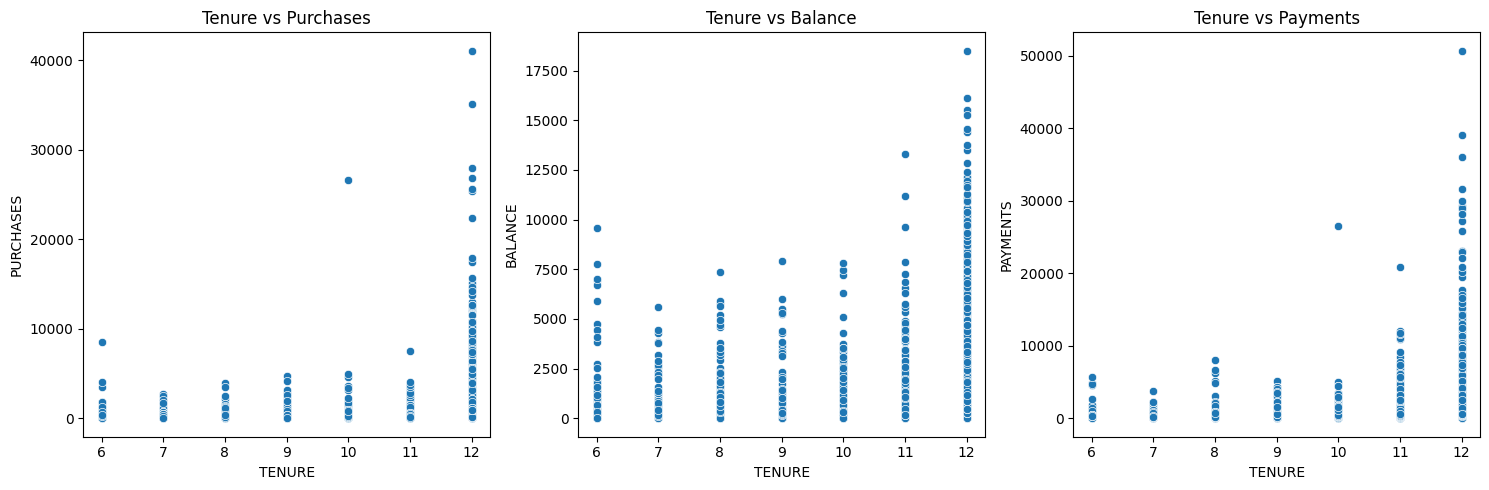

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TENURE', y='PURCHASES', data=df_new)
plt.title('Tenure vs Purchases')

plt.subplot(1, 3, 2)
sns.scatterplot(x='TENURE', y='BALANCE', data=df_new)
plt.title('Tenure vs Balance')

plt.subplot(1, 3, 3)
sns.scatterplot(x='TENURE', y='PAYMENTS', data=df_new)
plt.title('Tenure vs Payments')

plt.tight_layout()
plt.show()

Insight:
- Untuk tenure terhadap purchases terlihat pada grafik pertama bahwa secara sekilas untuk tenure 12 bulan jumlah pembelian semakin tinggi. ini bisa mengartikan semakin lama pelanggan bertahan, semakin besar kemungkinan mereka untuk melakukan pembelian.

- Sama juga seperti grafik ke dua yang menggambarkan tenure terhadap balance customer dimana juga terlihat semakin tinggi waktu tenure nya semakin banyak juga balance dari account customer. Ini bisa mengindikasikan bahwa pelanggan yang sudah lama merasa nyaman untuk mempertahankan saldo yang lebih tinggi, mungkin karena mereka percaya pada layanan atau memiliki limit kredit yang lebih besar.

- Hal ini juga terlihat sama pada payments dimana tenure 12 memiliki jumlah payment yang cukup tinggi dibandingkan dengan yang lainnya. Insight ini selaras dengan poin sebelumnya. Pelanggan dengan tenure lama mungkin memiliki pengeluaran dan saldo yang lebih tinggi, sehingga total pembayaran mereka juga lebih besar.

Rekomendasi Bisnis:
- kita bisa mencoba merikan reward dan insentif bagi pelanggan yang telah lama bergabung agar mereka semaki loyal terhadap perusahaan kita.
- dapat juga dilakukan analisis lebih lanjut karakteristik pelanggan di setiap tenure untuk kita berikan personalisasi penawaran.

Setelah analisis diatas selanjutnya kita akan menganalisis apakah nasabah dengan CREDIT_LIMIT yang tinggi cenderung lebih sering melakukan pembelian.

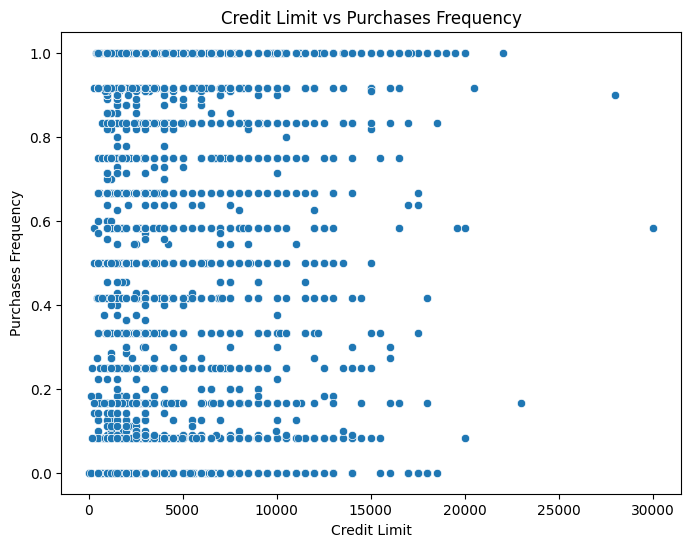

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES_FREQUENCY', data=df_new)
plt.title('Credit Limit vs Purchases Frequency')
plt.xlabel('Credit Limit')
plt.ylabel('Purchases Frequency')
plt.show()

In [49]:
# mencoba cek korelasi kolom credit_limit dan juga purchases_frequency dengan pearsonr

correlation = df_new['CREDIT_LIMIT'].corr(df_new['PURCHASES_FREQUENCY'])
print(f"Korelasi antara Credit Limit dan Purchases Frequency: {correlation}")

Korelasi antara Credit Limit dan Purchases Frequency: 0.10665901895512295


Insight:
- Terlihat menggunakan scatter plot bahwa data dari kedua kolom tersebut cukup tersebar. Hal ini dapat mengartikan tidak ada pola atau hubungan yang cukup jelas antara kedua variabel tersebut.

- Hal ini diperkuat lagi setelah kita melakukan cek korelasi dimana didapatkan angka 0.10 yang mengartikan bahwa CREDIT_LIMIT memiliki pengaruh yang sangatlah kecil terhadap PURCHASES_FREQUENCY.

Rekomendasi bisnis:
- Seperti yang kita dapatkan diatas dengan kemungkinan tidak adanya hubungan credit limit dengan jumlah frekuensi pembelian berarti tim marketing perusahaan dapat mengalihkan fokus marketing mereka ke faktor yang lebih berpengaruh lainnya terhadap frekuensi pembelian.

- Mungkin juga dapat membuat sebuah promo menarik untuk beberapa segmen pelanggan yang diluar dari credit limit mereka.

## 6. Feature Engineering

### 6.1 Split Numerical dan Categorical Column

In [50]:
df_new

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
9,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
11,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
12,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
13,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
8942,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
8943,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
8944,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [54]:
# saya ingin mengambil kolom numeric saja
num_col = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_col

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [61]:
X = df_new[num_col]
X.shape

(4475, 18)

Pembagian kolom numeric dan kategoric pada kasus ini sebenarnya tidak perlu dilakukan karena sudah terlihat bahwa pada dataset yang kita miliki semuanya merupakan kolom numerical. tetapi disini kita hanya memamsukkan kolom kolom itu kepada variabel baru saja.

### 6.2 Handling Outliers

In [64]:
#check distribution form skewness
listItem= []

for col in num_col:
  listItem.append([col, round(X[col].skew(),1), np.where(
    (round(X[col].skew(),1) <= 0.5) & (round(X[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,CUST_ID,0.0,normal
1,BALANCE,2.3,skewed
2,BALANCE_FREQUENCY,-2.0,skewed
3,PURCHASES,7.1,skewed
4,ONEOFF_PURCHASES,10.0,skewed
5,INSTALLMENTS_PURCHASES,6.3,skewed
6,CASH_ADVANCE,5.6,skewed
7,PURCHASES_FREQUENCY,0.1,normal
8,ONEOFF_PURCHASES_FREQUENCY,1.5,skewed
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.5,normal


Terlihat bahwa dari tiap kolom mayoritas skewed, kita akan melihat berapa persentase dari outliers masing masing kolom sehingga dapat kita analisis lebih lanjut bagaimana handling nya.

In [65]:
# buat upper, lower boundries dan cek persentase outliersnya

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]

  #cek upper and lower boundary

  if skewness['distribution'][row] == 'skewed':
    IQR = X[col].quantile(0.75) - X[col].quantile(0.25)
    lower_boundary = X[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X[col].mean() - 3* X[col].std()
    upper_boundary = X[col].mean() + 3* X[col].std()

  #append ke list

  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X[X[col] > upper_boundary]) / len(X) * 100) + (len(X[X[col] < lower_boundary]) / len(X) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,

    #round the value

    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,CUST_ID,12226.79,-3276.79,0.00
1,BALANCE,7816.98,-5644.98,2.08
2,BALANCE_FREQUENCY,1.33,0.56,13.43
3,PURCHASES,4291.00,-3149.02,4.65
4,ONEOFF_PURCHASES,2300.88,-1725.66,6.41
5,INSTALLMENTS_PURCHASES,1823.54,-1367.66,4.83
6,CASH_ADVANCE,4555.55,-3416.66,5.36
7,PURCHASES_FREQUENCY,1.70,-0.72,0.00
8,ONEOFF_PURCHASES_FREQUENCY,1.00,-0.75,0.00
9,PURCHASES_INSTALLMENTS_FREQUENCY,1.56,-0.83,0.00


Kolom BALANCE_FREQUENCY, ONEOFF_PURCHASES, CASH_ADVANCE, PRC_FULL_PAYMENT, TENURE terlihat memiliki persentase outliers cukup tinggi akan dicoba analisis lebih lanjut.



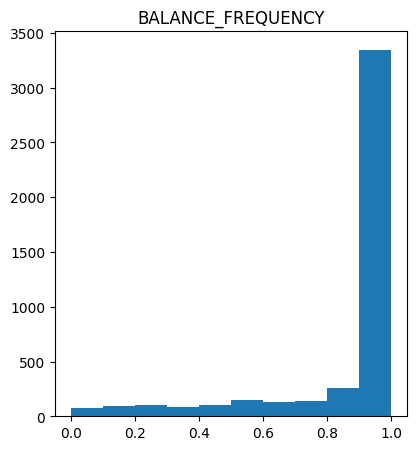

In [80]:
# Visualisasi untuk BALANCE_FREQUENCY
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X['BALANCE_FREQUENCY'], bins=10)
plt.title('BALANCE_FREQUENCY')
plt.show()

Tidak dihandling karena memang memungkinkan bahwa seseorang begitu sering mengupdate balance mereka. Bisa saja karena mereka sering membeli sebuah barang atau sebagainya.

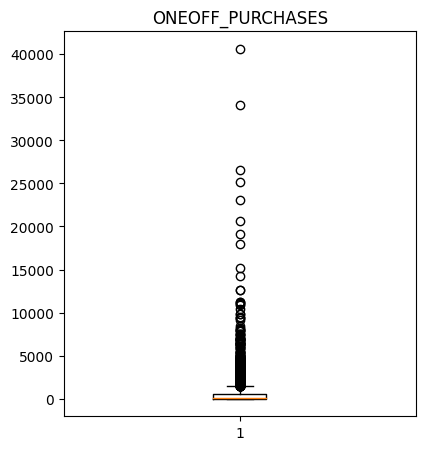

In [81]:
# Visualisasi untuk ONEOFF_PURCHASES
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(X['ONEOFF_PURCHASES'])
plt.title('ONEOFF_PURCHASES')
plt.show()

Melihat dari banyaknya customer yang merupakan pembeli banyak in one go, bisa saja ini mengindikasikan customer tersebut merupakan "high-spender", mempertahankan outlier mungkin penting untuk mengidentifikasi segmen tersebut.

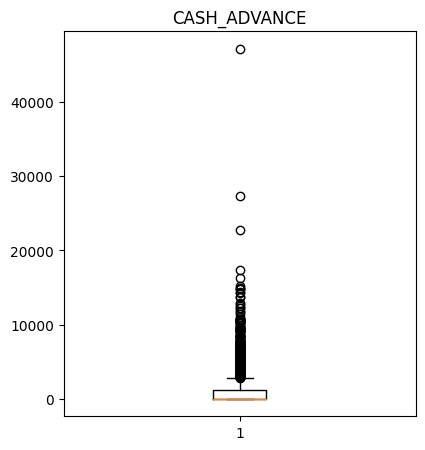

In [85]:
# Visualisasi untuk CASH_ADVANCE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(X['CASH_ADVANCE'])
plt.title('CASH_ADVANCE')
plt.show()

In [87]:
X['CASH_ADVANCE'].describe()

,CASH_ADVANCE
count,4475.000000
mean,984.288554
std,2060.448056
min,0.000000
25%,0.000000
50%,0.000000
75%,1138.887754
max,47137.211760


Masuk kepada cash advance yang memiliki persentase outliers yang moderate yaitu 5.36% dan juga menyinpan informasi yang cukup penting sehingga akan kita tidak handling.

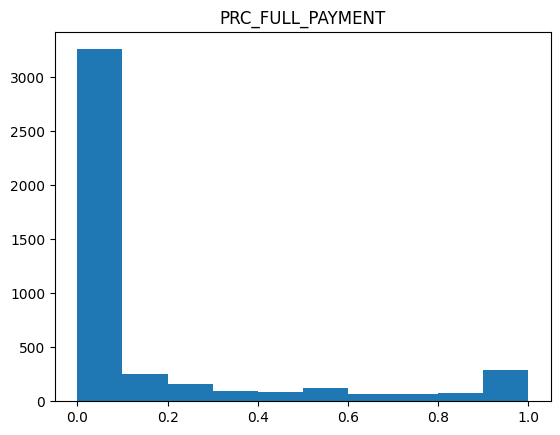

In [84]:
# Visualisasi untuk PRC_FULL_PAYMENT
plt.hist(X['PRC_FULL_PAYMENT'], bins=10)
plt.title('PRC_FULL_PAYMENT')
plt.show()

Kolom prc full payment menunjukkan persentase dari customer yang sudah membayarkan full pembayaran mereka. Disini terliha memang memungkin dalam data 6 bulan ini masih banyak customer yang belum mebayarkan secara full, dengan begitu saya memilih untuk tidak handle outliers tersebut juga.

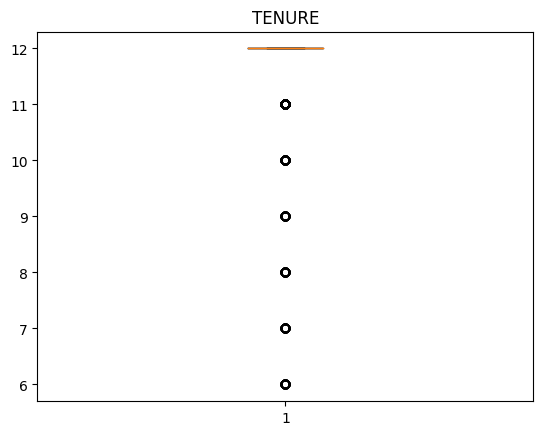

In [86]:
# Visualisasi untuk TENURE
plt.boxplot(X['TENURE'])
plt.title('TENURE')
plt.show()

Untuk kolom tenure merupakan salah satu kolom yang cukup penting outlier tinggi bisa berarti ada customer dengan masa keanggotaan yang jauh lebih pendek atau lebih panjang. Disini juga tidak dilakukan handling outliers agar kita dapat menjaga informasi tenure secara keseluruhan.

### 6.3. Handling Missing Value

In [88]:
# cek missing value
X.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


Melihat dari kolom yang memiliki missing value merupakan kolom minimum payments. disini bisa menandakan bisa saja cutomer tersebut memang belum membayarkan apa apa sehingga payment mereka NaN atau Missing Not At Random (MNAR).

In [91]:
# Handling missing value nya
X['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

In [92]:
# cek missing value kolom MINIMUM_PAYMENTS
X['MINIMUM_PAYMENTS'].isna().sum()

0

Diatas kita sudah measukkan nilai 0 kepada semua missing value tadi.

### 6.4 Scaling

In [97]:
# scaling data yang kita punya

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 6.5 PCA

In [98]:
pca = PCA()
pca.fit(X_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

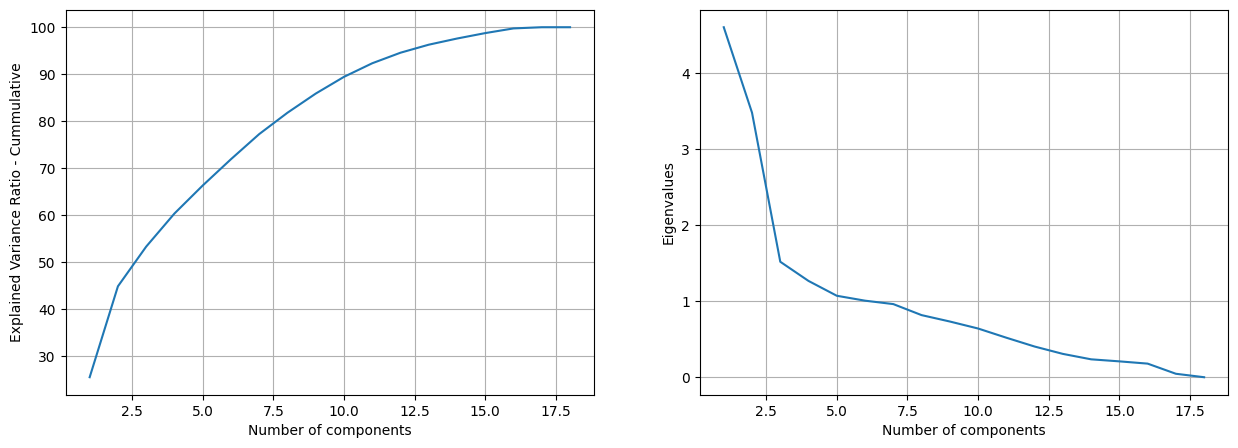

In [100]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [101]:
# cek jumlah fitu jika kita ingin mempertahankan 90% dari informasi kita

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.90) + 1
num_features

11

In [102]:
# lanjut train dengan mempertahankan 90% informasi tadi

pca = PCA(n_components=11)
pca.fit(X_scaled)

X_scaled_pca = pca.transform(X_scaled)

## 7. Finding Optimal Number of Clusters

### 7.1 Elbow Method

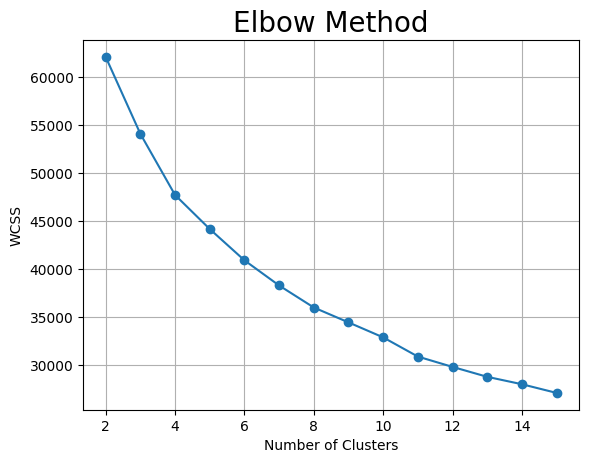

In [103]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(X_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Cukup sulit untuk melihat elbow dari grafik diatas, akan tetapi bisa kita lihat perubahan yang cukup terlihat berada pada cluster 4. Maka dari itu kita akan menggunakan cluster 4 untuk method elbow.

### 7.2 Silhoutte Score & Plot

Menggunakan Scikit-Learn

In [104]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.20944365547987204
For n_clusters = 3 The average silhouette_score is : 0.23357109301784207
For n_clusters = 4 The average silhouette_score is : 0.19178059789598487
For n_clusters = 5 The average silhouette_score is : 0.18933360525419607
For n_clusters = 6 The average silhouette_score is : 0.1915242259783191
For n_clusters = 7 The average silhouette_score is : 0.2022374946050059
For n_clusters = 8 The average silhouette_score is : 0.2066729575508759
For n_clusters = 9 The average silhouette_score is : 0.19827768839327048
For n_clusters = 10 The average silhouette_score is : 0.19810109234911144
For n_clusters = 11 The average silhouette_score is : 0.1932121196645492
For n_clusters = 12 The average silhouette_score is : 0.19201317947072374
For n_clusters = 13 The average silhouette_score is : 0.1601435821281131
For n_clusters = 14 The average silhouette_score is : 0.19497610087412687


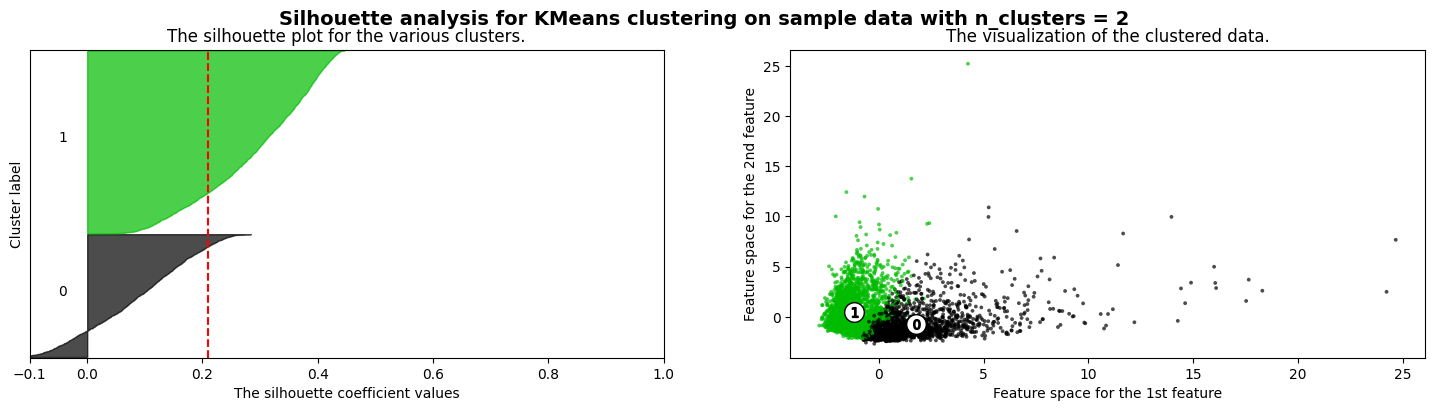

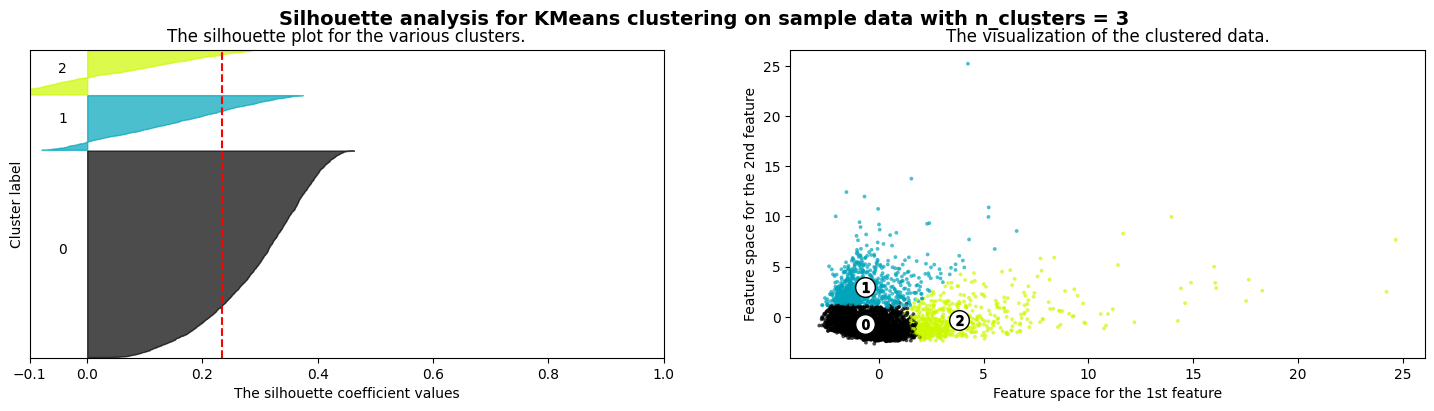

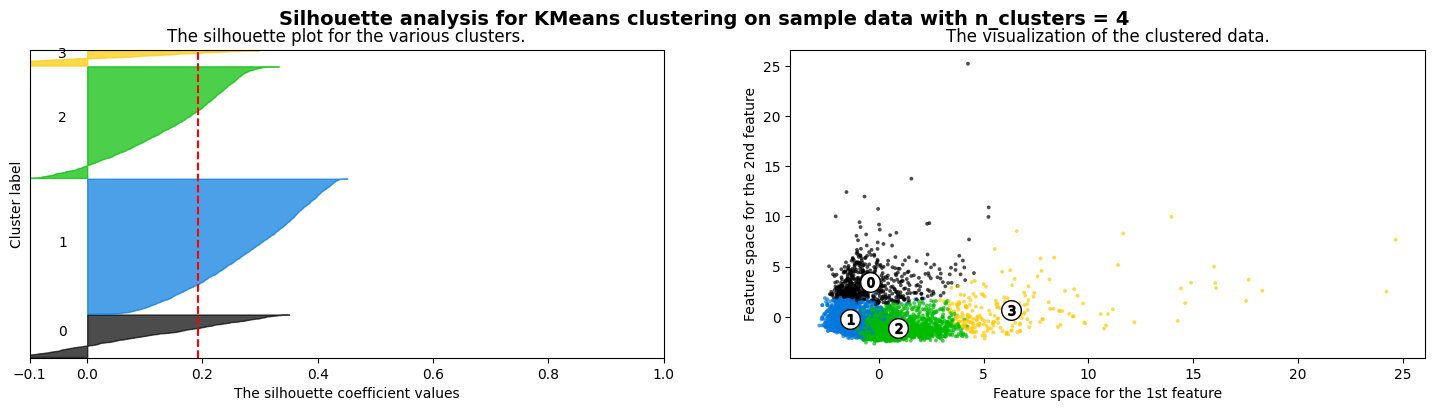

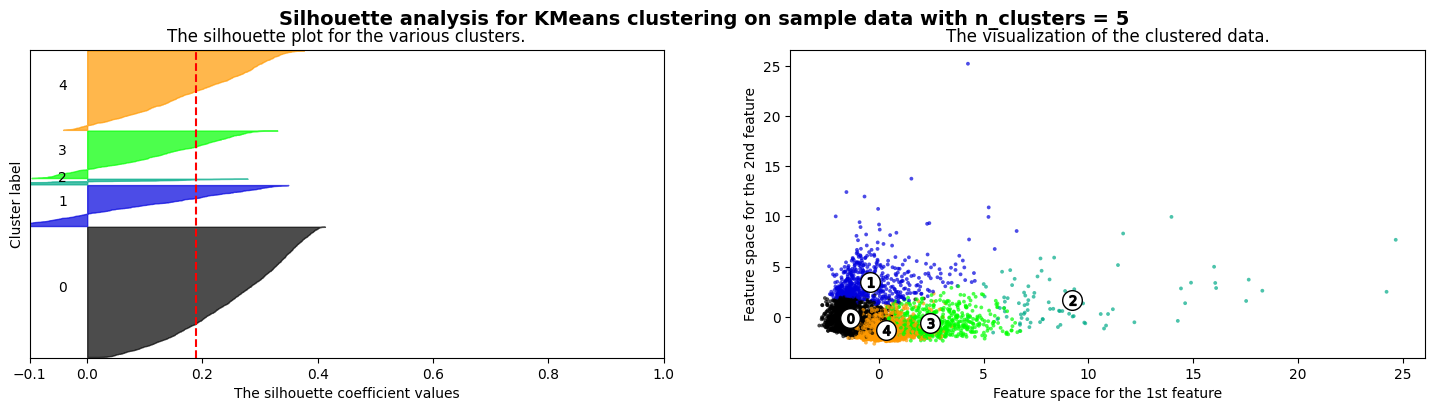

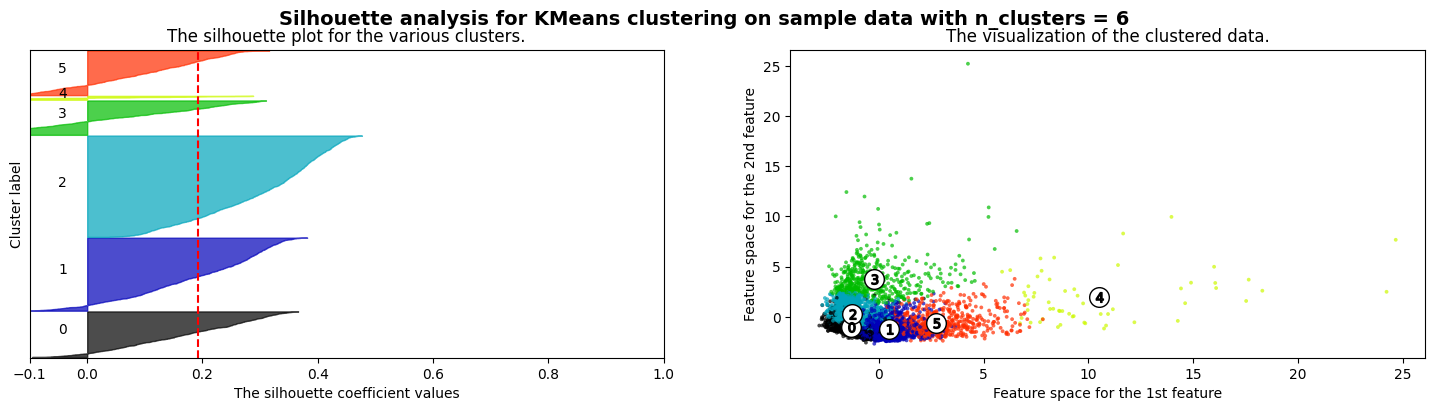

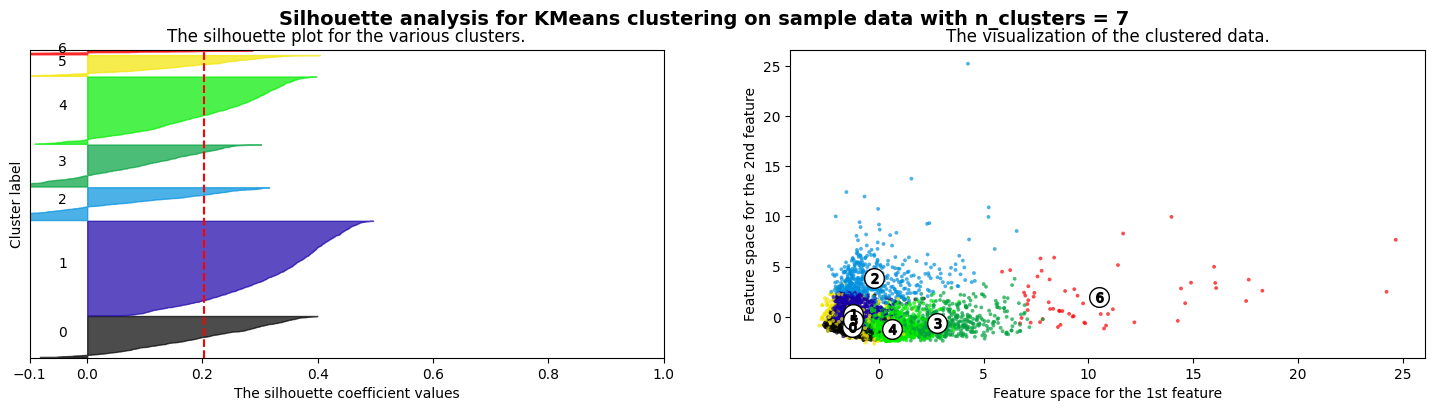

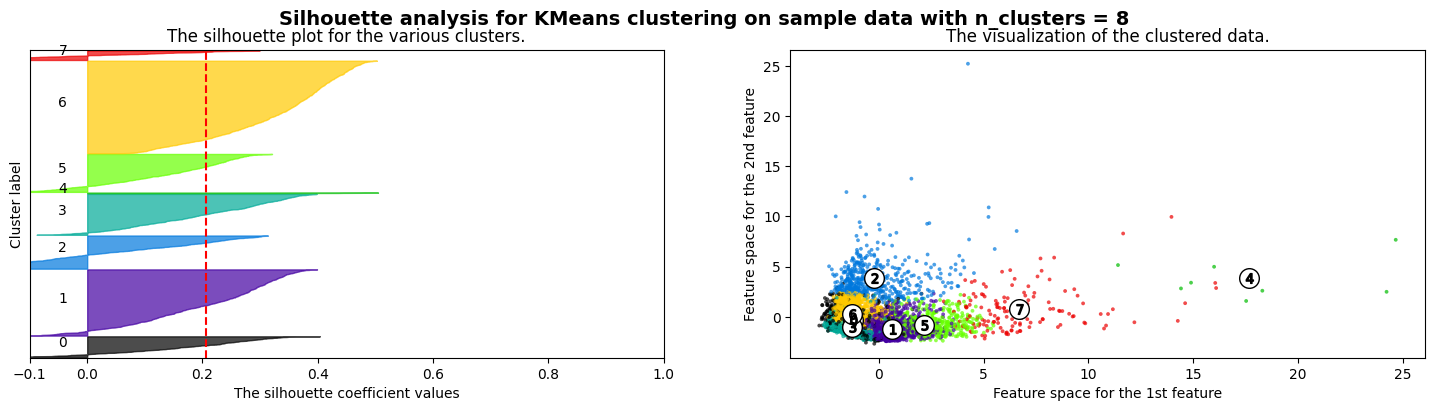

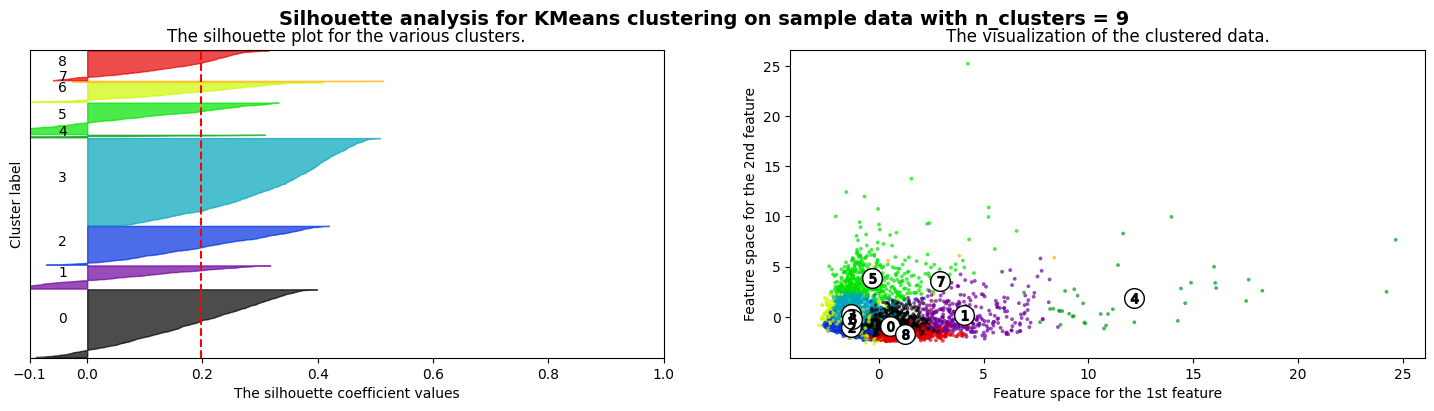

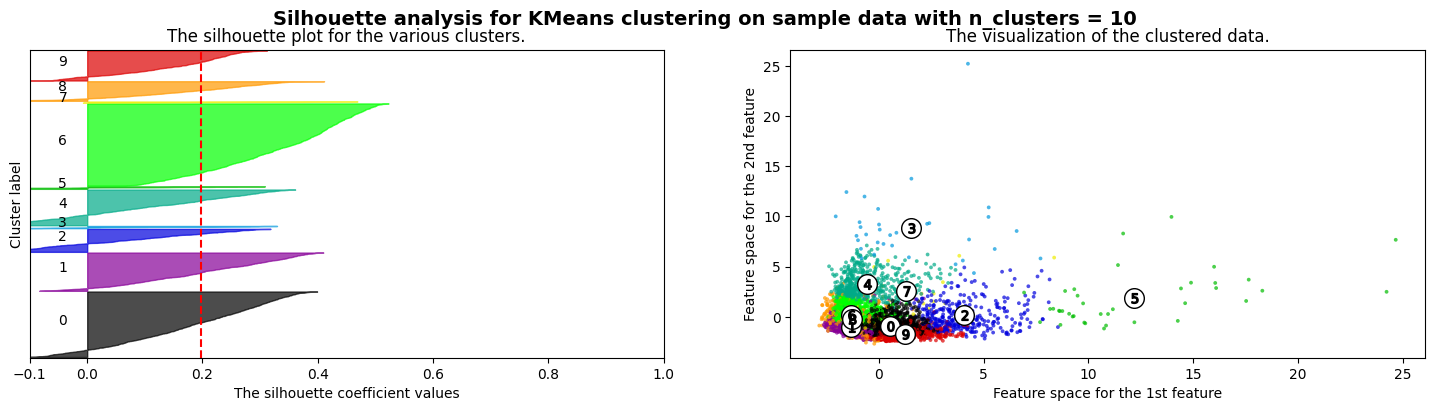

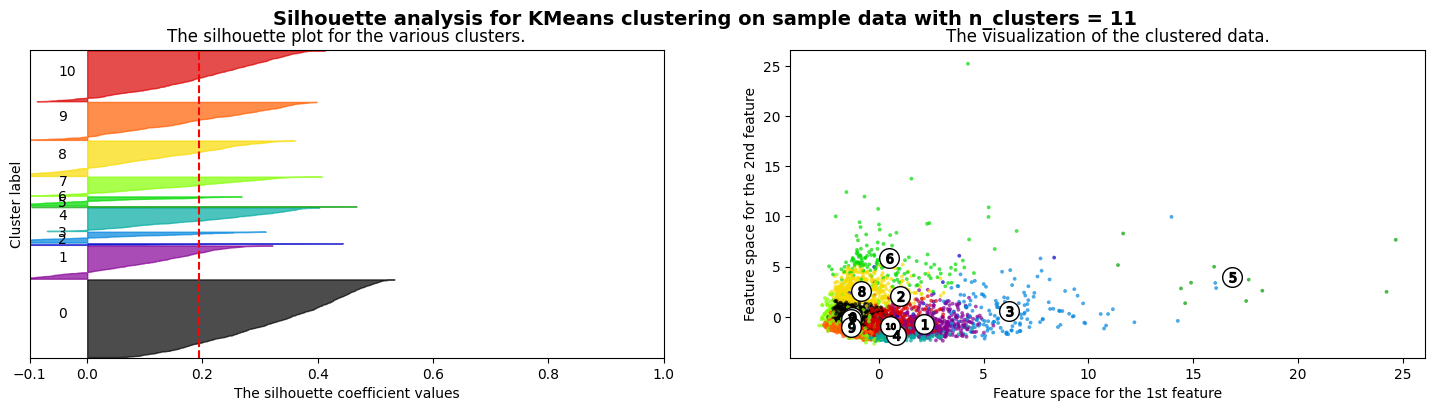

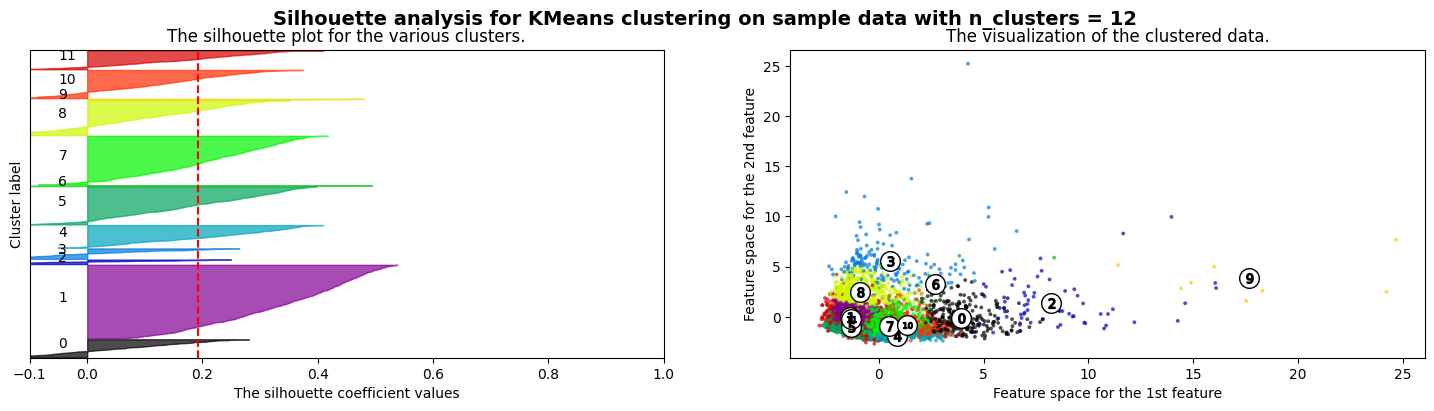

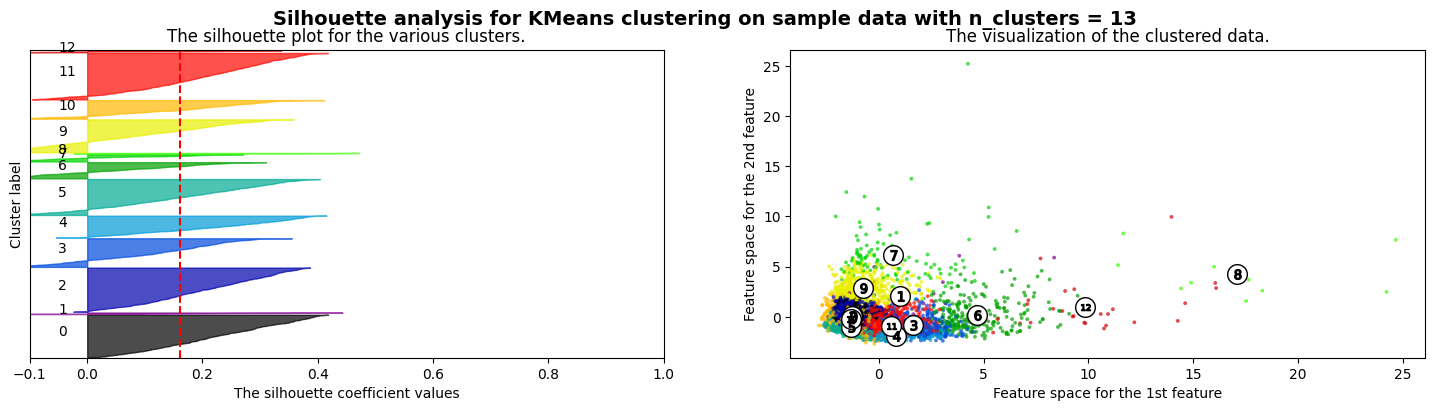

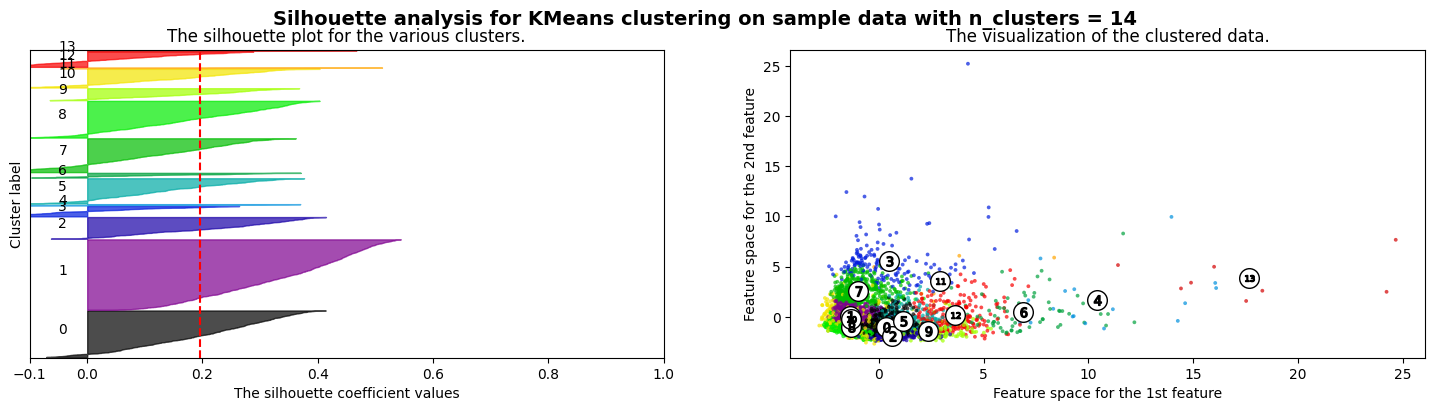

In [106]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), X_scaled_pca, random_state)

Melihat dari silhuette score untuk score tertingginya berada di cluster 3 maka dari itu kita akan menggunakan cluster 3 untuk method score. Sedangkan untuk plot, cukup sulit dilihat dimana pembagian yang cukup seimbang. Akan tetapi, bisa kita perhatikan sekilas pembagian 5 cluster terbilang cukup oke jika dilihat dari scater plot nya. Dengan begitu untuk metode sihluette plot kita akan menggunakan 5 cluster.

## 8. Model Definition & Training

### 8.1 Model Elbow

In [131]:
# Training menggunakan cluster dari method elbow

km_elbow = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred_elbow = km_elbow.fit_predict(X_scaled_pca)
pred_elbow

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

### 8.2 Model Score

In [132]:
# Train menggunkaan cluster dari method sihluette score

km_score = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred_score = km_score.fit_predict(X_scaled_pca)
pred_score

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

### 8.3 Model Plot

In [133]:
# Train menggunakan cluster dari method sihluette plot

km_plot = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred_plot = km_plot.fit_predict(X_scaled_pca)
pred_plot

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

## 9. Model Evaluation

### 9.1 Elbow

In [137]:
# masukkan cluster kedalam dataset

X_elbow = X.copy() #ini biar nyoba2 model lain
X_elbow['cluster'] = pred_elbow
X_elbow

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,0.000000,0.0,8,1
9,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,0.000000,0.0,8,1
11,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
12,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,1
13,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,0
8942,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,0
8943,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,1
8944,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,1


<Axes: >

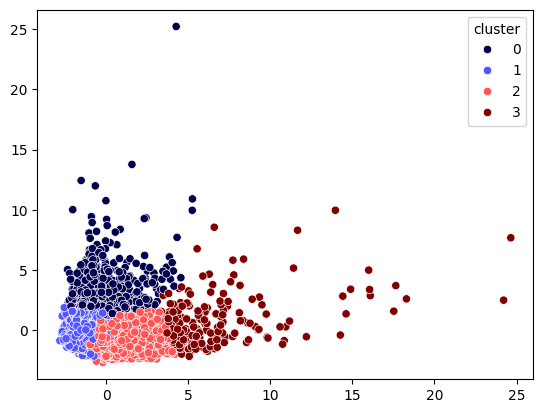

In [138]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(X_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(X_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=X_elbow['cluster'], palette='seismic')

In [148]:
# membagi menjadi 4 tabel berbeda dari masing masing cluster untuk dianalisis ciri-cirinya
elbow_cluster1 = X_elbow[X_elbow['cluster'] == 0]
elbow_cluster2 = X_elbow[X_elbow['cluster'] == 1]
elbow_cluster3 = X_elbow[X_elbow['cluster'] == 2]
elbow_cluster4 = X_elbow[X_elbow['cluster'] == 3]

Dibawah kita akan coba cek satu persatu ciri-ciri dari masing-masing cluster.

In [149]:
elbow_cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,625.0,4292.0912,2587.254816,23.0,2003.0,4081.0,6561.0,8947.0
BALANCE,625.0,4479.831339,2674.740772,168.600813,2347.486095,4169.458982,6014.806806,16115.5964
BALANCE_FREQUENCY,625.0,0.967911,0.088787,0.363636,1.0,1.0,1.0,1.0
PURCHASES,625.0,474.569008,815.790036,0.0,0.0,71.99,638.0,4911.41
ONEOFF_PURCHASES,625.0,293.086192,595.073401,0.0,0.0,0.0,299.0,4139.56
INSTALLMENTS_PURCHASES,625.0,181.538368,436.76609,0.0,0.0,0.0,142.5,3887.0
CASH_ADVANCE,625.0,4386.386541,3433.605981,0.0,2404.829712,3580.392989,5518.29804,47137.21176
PURCHASES_FREQUENCY,625.0,0.280193,0.356741,0.0,0.0,0.083333,0.583333,1.0
ONEOFF_PURCHASES_FREQUENCY,625.0,0.136359,0.225519,0.0,0.0,0.0,0.166667,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,625.0,0.17869,0.311739,0.0,0.0,0.0,0.25,1.0


Insight:
- terdapat 625 id yang masuk kedalam cluster 1
- rata-rata balance customer 4479
- memiliki rata-rata tenure 11
- dengan rata-rata purchase 474
- frekuensi pembelian berada di angka 0.3 yang mana cukup rendah
- "Cautious Spenders"

In [150]:
elbow_cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,1986.0,4514.401813,2547.570052,1.0,2380.0,4516.0,6713.5,8945.0
BALANCE,1986.0,993.55051,1102.594982,0.0,68.207814,725.589258,1466.902573,6937.806466
BALANCE_FREQUENCY,1986.0,0.786841,0.296726,0.0,0.545455,1.0,1.0,1.0
PURCHASES,1986.0,274.038046,474.760481,0.0,0.0,84.845,346.8775,4900.0
ONEOFF_PURCHASES,1986.0,210.967362,452.928524,0.0,0.0,0.0,207.92,4900.0
INSTALLMENTS_PURCHASES,1986.0,63.25145,159.242714,0.0,0.0,0.0,55.515,3000.0
CASH_ADVANCE,1986.0,559.837725,863.956719,0.0,0.0,96.058841,892.751664,6479.639793
PURCHASES_FREQUENCY,1986.0,0.175294,0.19315,0.0,0.0,0.083333,0.333333,0.916667
ONEOFF_PURCHASES_FREQUENCY,1986.0,0.087443,0.136228,0.0,0.0,0.0,0.111111,0.916667
PURCHASES_INSTALLMENTS_FREQUENCY,1986.0,0.084192,0.154188,0.0,0.0,0.0,0.083333,0.833333


Insight:
- Terdapat 1986 id
- rata-rata balance yang dimiliki 993
- rata-rata tenure disini juga berada pada 11
- rata-rata pembelian disini berada di angka 274
- rata-rata frekuensi pembelian di angka 0.2 yang termasuk rendah
- "Inactive Users"

In [151]:
elbow_cluster3.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,1641.0,4505.308349,2628.333979,3.0,2263.0,4549.0,6807.0,8949.0
BALANCE,1641.0,854.98003,1149.862514,0.0,78.287038,324.055174,1222.083116,7789.190958
BALANCE_FREQUENCY,1641.0,0.936426,0.162929,0.0,1.0,1.0,1.0,1.0
PURCHASES,1641.0,1226.451298,1037.842611,8.4,437.52,885.13,1755.76,5744.03
ONEOFF_PURCHASES,1641.0,592.673991,873.079787,0.0,0.0,165.0,869.06,5176.62
INSTALLMENTS_PURCHASES,1641.0,633.795588,626.243991,0.0,222.15,443.71,853.44,4313.22
CASH_ADVANCE,1641.0,224.132047,633.621387,0.0,0.0,0.0,0.0,7894.578816
PURCHASES_FREQUENCY,1641.0,0.890637,0.146389,0.416667,0.833333,1.0,1.0,1.0
ONEOFF_PURCHASES_FREQUENCY,1641.0,0.297974,0.35713,0.0,0.0,0.083333,0.583333,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,1641.0,0.71616,0.311261,0.0,0.583333,0.833333,1.0,1.0


Insight:

- ada 1641 id
- balance berada di rata-rata sekitar 854
- rata-rata tenure juga 11
- rata-rata pembelian disini 1226
- dengan purchase frequency yang tinggi yaitu 0.8
-"Regular Users"

In [152]:
elbow_cluster4.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,223.0,4413.699552,2560.97545,57.0,2268.0,4405.0,6541.0,8941.0
BALANCE,223.0,3673.710552,3277.811444,137.636267,974.151682,2648.784405,5566.405271,18495.55855
BALANCE_FREQUENCY,223.0,0.986506,0.063495,0.272727,1.0,1.0,1.0,1.0
PURCHASES,223.0,7336.762287,5241.706654,1567.25,4456.77,5714.5,8201.91,41050.4
ONEOFF_PURCHASES,223.0,4905.906726,5137.181481,0.0,2186.065,3657.3,6160.675,40624.06
INSTALLMENTS_PURCHASES,223.0,2433.546143,2503.807301,0.0,700.125,1669.81,3149.995,14686.1
CASH_ADVANCE,223.0,823.144753,2070.36259,0.0,0.0,0.0,681.047413,15133.53213
PURCHASES_FREQUENCY,223.0,0.944177,0.135407,0.166667,1.0,1.0,1.0,1.0
ONEOFF_PURCHASES_FREQUENCY,223.0,0.705993,0.297087,0.0,0.5,0.75,1.0,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,223.0,0.781546,0.309189,0.0,0.666667,0.916667,1.0,1.0


Insight:
- jumlah id terendah yaitu 223
- tetapi rata-rata balance cukup besar yaitu 3673
- tenure rata-rata berada di 12
- rata-rata purchase terjadi begitu banyak yaitu 7446
- dengan rata-rata frekuensi nya yang cukup sering yaitu 0.9
- "Big Spenders"

**Ciri-ciri Model Elbow:**

- Model ini membagi customer berdasarkan tingkat aktivitas, pengeluaran, dan frekuensi penggunaan kartu kredit.

- Model ini mampu mengidentifikasi "Big Spenders", yaitu segmen customer kecil namun bernilai tinggi yang berkontribusi besar pada pendapatan.

- Model ini mengungkapkan segmen "Inactive Users" yang dapat ditargetkan untuk reactivation campaigns, dan "Cautious Spenders" yang dapat didorong untuk meningkatkan penggunaan kartu kredit.

**Rekomendasi Bisnis:**

- Mungkin bisa dengan kembangkan strategi marketing dan penawaran produk yang disesuaikan dengan kebutuhan dan karakteristik masing-masing cluster.

- buat program loyalitas dengan tingkatan yang berbeda untuk memberikan reward dan benefit yang sesuai dengan nilai customer.

- seperti yang diatas "Reactivation Campaigns" dengan kampanye yang ditargetkan untuk mengaktifkan kembali "Inactive Users", misalnya dengan penawaran menarik atau benefit khusus.

- menawarkan layanan premium dan eksklusif untuk "Big Spenders" untuk mempertahankan loyalitas mereka.

### 9.2 Score

In [139]:
# masukkan cluster kedalam dataset

X_score = X.copy() #ini biar nyoba2 model lain
X_score['cluster'] = pred_score
X_score


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,0.000000,0.0,8,0
9,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,0.000000,0.0,8,0
11,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
12,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,0
13,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,1
8942,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,1
8943,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,1
8944,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,1


<Axes: >

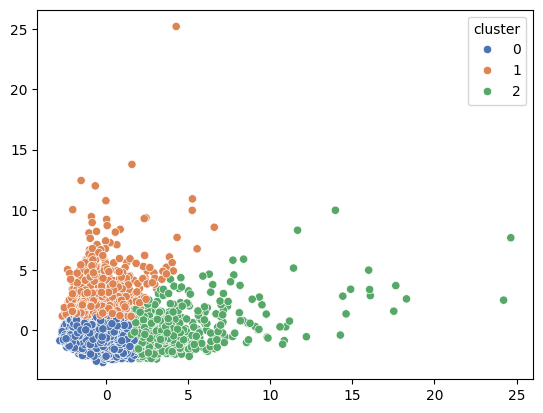

In [142]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(X_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(X_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=X_score['cluster'], palette='deep')

In [159]:
# membagi menjadi 3 tabel berbeda dari masing masing cluster untuk dianalisis ciri-cirinya
score_cluster1 = X_score[X_score['cluster'] == 0]
score_cluster2 = X_score[X_score['cluster'] == 1]
score_cluster3 = X_score[X_score['cluster'] == 2]


Dibawah kita akan coba cek satu persatu ciri-ciri dari masing-masing cluster.

In [156]:
score_cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,3027.0,4519.848365,2580.727466,1.0,2313.0,4537.0,6754.0,8949.0
BALANCE,3027.0,793.754795,955.470501,0.0,55.452855,406.707189,1227.882752,5901.592192
BALANCE_FREQUENCY,3027.0,0.83362,0.27055,0.0,0.727273,1.0,1.0,1.0
PURCHASES,3027.0,486.891738,573.714096,0.0,58.51,295.0,711.9,4900.0
ONEOFF_PURCHASES,3027.0,246.790902,472.525493,0.0,0.0,0.0,292.0,4900.0
INSTALLMENTS_PURCHASES,3027.0,240.222078,367.244985,0.0,0.0,77.18,354.915,3200.0
CASH_ADVANCE,3027.0,329.136516,640.116736,0.0,0.0,0.0,358.186741,4892.793928
PURCHASES_FREQUENCY,3027.0,0.461528,0.379923,0.0,0.083333,0.416667,0.833333,1.0
ONEOFF_PURCHASES_FREQUENCY,3027.0,0.129329,0.216977,0.0,0.0,0.0,0.166667,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,3027.0,0.34353,0.382521,0.0,0.0,0.166667,0.666667,1.0


Insight:

- jumlah id 3027
- rata-rata balance 793
- tenure rata-rata 11
- pembelian rata-rata 486
- rata-rata frekuensi 0.4 yang bisa dibilang cukup rendah


In [157]:
score_cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,803.0,4373.595268,2583.964168,23.0,2080.0,4231.0,6639.0,8947.0
BALANCE,803.0,4001.432825,2587.627335,4.382924,1929.406697,3553.326258,5598.608551,16115.5964
BALANCE_FREQUENCY,803.0,0.958274,0.111239,0.181818,1.0,1.0,1.0,1.0
PURCHASES,803.0,382.749103,748.784382,0.0,0.0,0.0,462.5,7194.53
ONEOFF_PURCHASES,803.0,248.486463,581.802809,0.0,0.0,0.0,229.0,6678.26
INSTALLMENTS_PURCHASES,803.0,134.333275,366.086583,0.0,0.0,0.0,59.15,3887.0
CASH_ADVANCE,803.0,3849.53261,3270.900064,0.0,1936.410928,3122.99024,4839.261862,47137.21176
PURCHASES_FREQUENCY,803.0,0.232975,0.335261,0.0,0.0,0.0,0.416667,1.0
ONEOFF_PURCHASES_FREQUENCY,803.0,0.115413,0.212656,0.0,0.0,0.0,0.166667,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,803.0,0.143411,0.285125,0.0,0.0,0.0,0.087121,1.0


Insight:

- jumlah id 803
- rata-rata balance 4001
- tenure rata-rata 11
- pembelian rata-rata 382
- rata-rata frekuensi 0.2 yang termasuk rendah


In [158]:
score_cluster3.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,645.0,4390.770543,2597.226482,9.0,2155.0,4371.0,6589.0,8941.0
BALANCE,645.0,2138.75854,2582.90897,12.423203,327.508171,1136.796512,2997.977825,18495.55855
BALANCE_FREQUENCY,645.0,0.978937,0.086124,0.090909,1.0,1.0,1.0,1.0
PURCHASES,645.0,4199.040217,3908.336227,498.17,2143.28,3125.03,4837.88,41050.4
ONEOFF_PURCHASES,645.0,2670.053612,3534.057301,0.0,864.38,1787.77,3237.47,40624.06
INSTALLMENTS_PURCHASES,645.0,1529.916837,1761.459814,0.0,455.54,1089.92,1951.52,14686.1
CASH_ADVANCE,645.0,491.814508,1322.156811,0.0,0.0,0.0,229.028245,15133.53213
PURCHASES_FREQUENCY,645.0,0.947622,0.116804,0.083333,0.916667,1.0,1.0,1.0
ONEOFF_PURCHASES_FREQUENCY,645.0,0.652936,0.320033,0.0,0.416667,0.727273,1.0,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,645.0,0.733901,0.33138,0.0,0.583333,0.916667,1.0,1.0


Insight:

- jumlah id 645
- rata-rata balance 2138
- tenure rata-rata 12
- pembelian rata-rata 4199
- rata-rata frekuensi 0.9 yang termasuk sangat tinggi


**Ciri-ciri Model 3 Cluster:**

- Model ini menekankan pada customer yang aktif menggunakan kartu kredit, baik dengan pengeluaran moderat maupun tinggi.

- Dibandingkan model elbow , model score ini mungkin kurang detail dalam mengidentifikasi customer yang tidak aktif atau jarang menggunakan kartu kredit.

**Rekomendasi Bisnis:**

Strategi yang Berbeda untuk Setiap Cluster:

- Cluster 1 ("Moderate Spenders"): Fokus pada peningkatan engagement dan edukasi atau keuntungan dari kartu kredit.

- Cluster 2 ("High Balance, Low Activity"): Perlu dilakukan analisis lebih lanjut tentang mengapa ini terjadi(balance tinggi tapi aktifitas rendah).

- Cluster 3 ("High-Frequency Spenders"): Memberikan promo menarik, benefit eksklusif, dan penawaran personal untuk mempertahankan loyalitas mereka.

### 9.3 Plot

In [136]:
# masukkan cluster kedalam dataset

X_plot = X.copy() #ini biar nyoba2 model lain
X_plot['cluster'] = pred_plot
X_plot


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,0.000000,0.0,8,0
9,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,0.000000,0.0,8,0
11,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
12,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,0
13,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,1
8942,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,1
8943,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,0
8944,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,0


<Axes: >

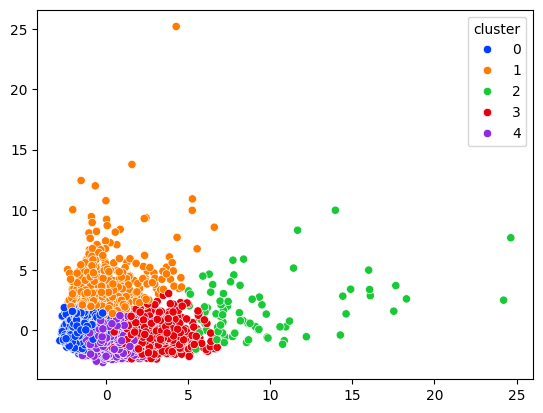

In [144]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(X_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(X_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=X_plot['cluster'], palette='bright')

In [160]:
# membagi menjadi 5 tabel berbeda dari masing masing cluster untuk dianalisis ciri-cirinya
plot_cluster1 = X_plot[X_plot['cluster'] == 0]
plot_cluster2 = X_plot[X_plot['cluster'] == 1]
plot_cluster3 = X_plot[X_plot['cluster'] == 2]
plot_cluster4 = X_plot[X_plot['cluster'] == 3]
plot_cluster5 = X_plot[X_plot['cluster'] == 4]

Dibawah kita akan coba cek satu persatu ciri-ciri dari masing-masing cluster.

In [161]:
plot_cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,1919.0,4480.36321,2547.872368,1.0,2300.0,4463.0,6679.0,8945.0
BALANCE,1919.0,1043.289999,1131.519711,0.0,97.421191,803.033404,1532.524664,7024.269179
BALANCE_FREQUENCY,1919.0,0.794445,0.294577,0.0,0.571429,1.0,1.0,1.0
PURCHASES,1919.0,267.043314,454.081676,0.0,0.0,70.0,333.905,3950.0
ONEOFF_PURCHASES,1919.0,213.610412,424.570542,0.0,0.0,0.0,220.85,3950.0
INSTALLMENTS_PURCHASES,1919.0,53.479281,149.112284,0.0,0.0,0.0,31.89,3000.0
CASH_ADVANCE,1919.0,593.185909,890.585944,0.0,0.0,127.321884,925.666221,6479.639793
PURCHASES_FREQUENCY,1919.0,0.158961,0.179181,0.0,0.0,0.083333,0.25,0.916667
ONEOFF_PURCHASES_FREQUENCY,1919.0,0.09248,0.141409,0.0,0.0,0.0,0.142857,0.916667
PURCHASES_INSTALLMENTS_FREQUENCY,1919.0,0.06548,0.124772,0.0,0.0,0.0,0.083333,0.583333


Insight:

- jumlah id 1919
- rata-rata balance 1043
- tenure rata-rata 11
- pembelian rata-rata 267
- rata-rata frekuensi 0.1 yang termasuk sangat rendah


In [162]:
plot_cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,604.0,4272.983444,2573.133268,23.0,1990.5,4093.0,6505.0,8947.0
BALANCE,604.0,4471.370805,2691.728282,168.600813,2331.766624,4161.468244,6027.650048,16115.5964
BALANCE_FREQUENCY,604.0,0.967247,0.090051,0.363636,1.0,1.0,1.0,1.0
PURCHASES,604.0,487.578742,894.913611,0.0,0.0,66.16,633.5875,7194.53
ONEOFF_PURCHASES,604.0,298.295778,650.820494,0.0,0.0,0.0,289.1075,6678.26
INSTALLMENTS_PURCHASES,604.0,189.340447,454.727129,0.0,0.0,0.0,159.25,3887.0
CASH_ADVANCE,604.0,4491.746758,3478.564321,0.0,2433.669063,3694.474151,5583.615209,47137.21176
PURCHASES_FREQUENCY,604.0,0.27955,0.357078,0.0,0.0,0.083333,0.583333,1.0
ONEOFF_PURCHASES_FREQUENCY,604.0,0.136121,0.226168,0.0,0.0,0.0,0.166667,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,604.0,0.181415,0.314943,0.0,0.0,0.0,0.25,1.0


Insight:

- jumlah id 604
- rata-rata balance 4471
- tenure rata-rata 11
- pembelian rata-rata 487
- rata-rata frekuensi 0.2 yang juga termasuk sangat rendah


In [163]:
plot_cluster3.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,83.0,4453.554217,2506.531104,135.0,2550.0,4469.0,6559.0,8941.0
BALANCE,83.0,4895.02214,3922.788469,561.003319,1792.615366,3879.064446,6865.15926,18495.55855
BALANCE_FREQUENCY,83.0,0.975794,0.096463,0.272727,1.0,1.0,1.0,1.0
PURCHASES,83.0,11214.973735,6806.091567,3629.8,7111.095,9362.96,12508.58,41050.4
ONEOFF_PURCHASES,83.0,7256.219036,7472.08661,0.0,2678.42,4939.1,9468.62,40624.06
INSTALLMENTS_PURCHASES,83.0,3965.983614,3305.560273,0.0,1611.32,3109.29,5284.855,14686.1
CASH_ADVANCE,83.0,1144.223293,2673.544582,0.0,0.0,0.0,1017.147049,15133.53213
PURCHASES_FREQUENCY,83.0,0.930522,0.171116,0.166667,1.0,1.0,1.0,1.0
ONEOFF_PURCHASES_FREQUENCY,83.0,0.676305,0.314435,0.0,0.5,0.666667,1.0,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,83.0,0.831928,0.276559,0.0,0.775,1.0,1.0,1.0


Insight:

- jumlah id 83
- rata-rata balance 4895
- tenure rata-rata 12
- pembelian rata-rata 11214
- rata-rata frekuensi 0.9 yang juga termasuk sangat tinggi


In [164]:
plot_cluster4.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,699.0,4456.178827,2637.5168,9.0,2179.0,4451.0,6785.0,8937.0
BALANCE,699.0,1628.519955,1908.119343,0.41367,262.182684,870.783501,2358.807456,10124.47214
BALANCE_FREQUENCY,699.0,0.976237,0.082547,0.181818,1.0,1.0,1.0,1.0
PURCHASES,699.0,2660.158999,1677.195392,8.4,1392.905,2339.3,3603.115,8631.0
ONEOFF_PURCHASES,699.0,1886.725265,1479.524575,0.0,811.155,1469.5,2485.815,8053.95
INSTALLMENTS_PURCHASES,699.0,773.433734,880.054445,0.0,72.5,479.5,1195.735,5580.85
CASH_ADVANCE,699.0,333.313172,808.936121,0.0,0.0,0.0,146.599049,7894.578816
PURCHASES_FREQUENCY,699.0,0.914628,0.139085,0.166667,0.9,1.0,1.0,1.0
ONEOFF_PURCHASES_FREQUENCY,699.0,0.724309,0.262011,0.0,0.522728,0.75,1.0,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,699.0,0.552426,0.389726,0.0,0.083333,0.666667,0.916667,1.0


Insight:

- jumlah id 699
- rata-rata balance 1628
- tenure rata-rata 12
- pembelian rata-rata 2660
- rata-rata frekuensi 0.9 yang juga termasuk tinggi juga


In [165]:
plot_cluster5.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,1170.0,4583.25812,2619.035202,3.0,2327.5,4708.0,6865.0,8949.0
BALANCE,1170.0,639.266514,938.906364,0.0,45.075667,167.315749,992.696889,5920.486917
BALANCE_FREQUENCY,1170.0,0.899264,0.208424,0.0,0.909091,1.0,1.0,1.0
PURCHASES,1170.0,762.651385,656.316769,28.8,308.375,545.71,1020.5975,4709.14
ONEOFF_PURCHASES,1170.0,134.682991,284.18359,0.0,0.0,0.0,137.58,3227.85
INSTALLMENTS_PURCHASES,1170.0,628.224803,582.150029,25.92,259.12,443.2,790.5425,4313.22
CASH_ADVANCE,1170.0,192.646186,568.474911,0.0,0.0,0.0,0.0,5001.962631
PURCHASES_FREQUENCY,1170.0,0.85888,0.169333,0.333333,0.75,0.916667,1.0,1.0
ONEOFF_PURCHASES_FREQUENCY,1170.0,0.071101,0.122625,0.0,0.0,0.0,0.083333,0.75
PURCHASES_INSTALLMENTS_FREQUENCY,1170.0,0.801678,0.200644,0.2,0.666667,0.833333,1.0,1.0


Insight:

- jumlah id 1170
- rata-rata balance 639
- tenure rata-rata 11
- pembelian rata-rata 762
- rata-rata frekuensi 0.8 yang bisa dibilang cukup oke


Kesimpulan:

Model plot ini memberikan segmentasi customer yang lebih detail dibandingkan model score dan elbow. Model ini mampu mengidentifikasi pola dalam perilaku customer dan membagi "Big Spenders" menjadi dua kelompok yang lebih spesifik, yaitu "Elite Spenders" dan "Frequent Value Seekers".

Ciri-ciri Model 5 Cluster:

- Memberikan pemahaman yang lebih dalam tentang perilaku customer dengan membagi cluster berdasarkan kombinasi saldo, pengeluaran, dan frekuensi penggunaan.

- bisa mengidentifikasi "Elite Spenders" sebagai segmen customer paling berharga.

- bisa jadi peluang untuk mengembangkan strategi yang lebih terfokus untuk setiap segmen customer.

Rekomendasi Bisnis:

- membuat program referral yang menargetkan "Elite Spenders" dan "Frequent Value Seekers" untuk mendapatkan customer baru dengan profil serupa.

- buat event eksklusif untuk "Elite Spenders" untuk meningkatkan loyalitas mereka.

- mungkin kita juga dapat menjalin kerjasama dengan brand premium untuk menawarkan produk dan layanan eksklusif kepada "Elite Spenders".

## 10. Model Analysis

Dari tiga model yang telah dibuat diatas saya memilih untuk menggunakan model elbow yang mana menggunakan 4 cluster. Pertimbangannya berasal dari jumlah data kita yang cukup kecil jika membagi data menjadi 5 cluster terutama untuk segmen "Elite Spenders" yang biasanya memiliki proporsi kecil. Selanjutnya model dengan lebih banyak cluster cenderung membutuhkan biaya yang lebih tinggi untuk implementasi. Model elbow cukup seimbang antara detail segmentasi dan efisiensi biaya.

**Keunggulan Model Elbow:**

- Masih mampu mengidentifikasi perbedaan signifikan dalam perilaku customer, termasuk "Big Spenders".
- Lebih mudah untuk mengimplementasikan dan memantau strategi untuk 4 cluster dibandingkan 5 cluster.
- Mengurangi kompleksitas sehingga biaya yang dikeluarkan juga lebih sedikit dari model plot.

**Kelemahan Model Elbow:**

- Dibandingkan dengan model 5 cluster, model 4 cluster mungkin kurang detail dalam mengidentifikasi nuansa perilaku customer.

- Mengelompokkan customer ke dalam 4 cluster dapat menyebabkan overgeneralisasi dan mengaburkan perbedaan kecil yang mungkin signifikan.

- Model ini mungkin kurang fleksibel dalam mengakomodasi perubahan perilaku customer atau kondisi pasar.

**Relevansi Model Terhadap Objective**:

Berdasarkan objective kita ingin membagi beberapa customer segmentation sehingga dapat bisa kita berikan rekomndasi bisnis sesuai dengan segmennya. Dengan menggunakan model elbow ini, kita dapat membagi cutomer menjadi 4 bagian yaitu Cautious Spenders, Inactive Users, Regular Users, dan juga BIg Spender. Hal ini memudahkan kita untuk memberikan penanganan bisnis yang tepat melihat dari tipe customernya.

## 11. Model Saving

In [169]:
#Save Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_col, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

with open('kmeans.pkl', 'wb') as file_4:
  pickle.dump(km_elbow, file_4)

## 12. Pengambilan Kesimpulan

Poin-poin penitng yang bisa kita ambil dari analisis kita diatas adalah:
- Tinggi nya tenure yang dimiliki customer juga berpengaruh kepada banyaknya pembelian yang customer lakukan. Biasanya semakin tinggi tenure nya maka pembeliannya juga semakin banyak.

- Hal ini juga beriringan dengan balance customer yang memiliki tenure tinggi juga kebanyakan memiliki balance yang besar.

- Sama juga hal nya dengan total payment yang mana untuk customer dengan tenure 12 akan lebih besar melakukan paymnet dibandingkan dengan customer dengan tenure rendah.

- Model yang cocok untuk bisnis kita setelah dilakukan evaluasi adalah model elbow dimana membagi menjadi 4 cluster. Dengan memperhitungkan efektivitas dari model serta biaya yang akan digunakan, model elbow cukup baik untuk tujuan objective kita.

- Improvement yand dapat dilakukan kedepannya tentunya analisis yang lebih dalam terhadap masing masing model, dimana ini hanya melihat sekilas 3 buah model.

- Improvement ke 2 yang mungkin bisa dipertimbangkan adalah handling dari persebaran datanya dimana K-means kemungkinan terlalu berpengaruh dengan data yang skewed sehingga pembagian dari cluster kurang maksimal.

